# Dataload and import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


In [ ]:
## 본인의 디렉토리에 맞게 설정하세요 
data = pd.read_csv('C:/Users/Kim Yuum/Desktop/투빅스/1주차 로지스틱 수정/assignment_2.csv',engine='python')
data = data.rename(columns={'癤풪abel':'Label'})
data.head()


In [ ]:
data['salary']=data['salary'].apply(lambda x : x/10000)
data.ix[0].Label

# Logistic regression 해야하는 data 의 scatter plot

In [13]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


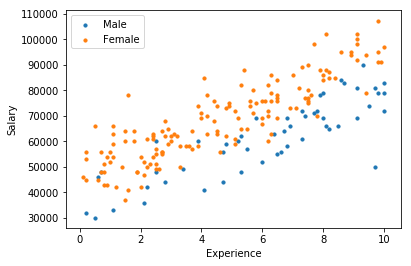

In [14]:
# plots
fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male')
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.legend()
plt.show()

In [4]:
## 독립변수들
X = data.iloc[:, 1:]

# rescaled_X 
normalized_X = (X[['experience','salary']]-X[['experience','salary']].mean())/X[['experience','salary']].std()
normalized_X['bias'] = X['bias']
cols = normalized_X.columns.tolist()
cols = cols[-1:] + cols[:-1]
normalized_X = normalized_X[cols]
normalized_X = normalized_X.values.tolist()
X= np.array(normalized_X)
df = data.drop('bias', 1)
#print(X)
#print(cols)

#Basic_X
# X = X.values.tolist()
# X = np.array(X)
#X

# 종속변수 Target = T 
T = data['Label']
T = T.values.tolist()
T = np.array(T)
#print(T)

# 회귀계수
beta = np.random.randn(3)
#beta= np.array([1,1,1])
#beta

## 회귀식
## $$ a_n=B^TX = \hat{B}_0 +\hat{B}_1x_1 +\hat{B}_2x_2 ,    \quad\mbox{n=데이터 수}$$




In [5]:
# 내적 -> 회귀계수와 X의 선형결합 
a = X.dot(beta)
a

array([-1.36345298e+00, -1.04490546e+00, -1.18981740e+00, -8.14588179e-01,
       -6.66301410e-01, -3.56131619e-01, -2.68117012e-01, -4.13028953e-01,
       -1.27011152e-01,  2.18081992e-01, -1.21016331e+00, -1.37563679e+00,
        3.19477225e-01, -6.39755783e-01, -1.22833121e+00, -2.48967921e-01,
       -6.94043854e-01, -7.01224764e-01, -1.48660657e+00, -4.38162135e-01,
       -9.07605685e-01, -2.30584396e-01, -7.65303006e-01, -9.26754776e-01,
       -1.45179051e-01, -3.17402185e-01, -5.02456004e-01, -1.06427018e+00,
        1.96539264e-01, -1.00421364e+00, -4.43380660e-01, -1.47703202e+00,
       -1.33930099e+00, -1.33690736e+00, -1.78905587e-01, -1.31395218e+00,
       -9.60265686e-01, -6.50742773e-01, -8.85631705e-01, -7.72483916e-01,
       -3.20011447e-01, -1.03533092e+00, -1.36345298e+00, -1.07863200e+00,
       -1.09060018e+00, -5.04418389e-01, -7.04599593e-01, -2.92269002e-01,
       -1.63750260e+00, -2.11435305e-01, -1.03533092e+00, -5.79300111e-02,
       -5.30964015e-01, -

## $$ \mbox 로그오즈 = 회귀식을\  p에\  대해서\  정리 $$
## $$ log(Odds) = \hat{B}_0 +\hat{B}_1x_1 + \hat{B}_2x_2 $$
## $$ \mbox P는 \ 로지스틱 \ 함수 $$
## $$ P = \frac{\mathrm{1} }{\mathrm{1} + e^{-a_n}} = \sigma(x,B) $$ 

In [6]:
#'''
#함수를 구현하세요 
#INPUT: 회귀식(a)
#Output: P
#'''

def logoz (a):  #로지스틱 함수 수식에 따라 함수 구현
    p = 1/(1+np.exp(-a))
    return p

p = logoz(a)
p.shape

(200,)

## $$ \mbox 각\  데이터가\  따르는\  확률분포를\   label\  y와\  엮어서\  표현  $$

## $$ P(x_i,y_i | B) = \begin{cases} \sigma(x,B)^{y}, & \mbox{if }y\mbox{ = 1} \\ (1-\sigma(x,B))^{1-y}, & \mbox{if }y\mbox{ = 0} \end{cases} $$

## $$ \mbox 위의 \ 확률분포를 \ 따르는 \   데이터에서 \ 얻은 \ Likelihood  $$

## $$ L = \sigma(x,B)^{y}(1-\sigma(x,B))^{1-y} $$ 

## $$ \mbox log 변환  $$

## $$ L^*=log(L) = ylog\sigma(x,B) + (1-y)log(1-\sigma(x,B)) $$ 

## $$ \mbox Convex\  function으로\  만들기\  위한 \ (-) 곱   $$

## $$ \mbox J는\ Loss\ Function  $$

## $$ J= - L^* $$

## $$ \mbox Loss\ function \ = \ Negative\ log \ likelihood\  $$

## $$ \mbox N개의 \ 데이터에\ 대한\ Negative\ \ log Likelihood  $$
## $$ J(x_i,y_i|B) = -y_i\sum_{i=1}^N log\sigma(x_i,B)- (1-y_i)\sum_{i=1}^Nlog(1-\sigma(x_i,B)) $$ 


In [7]:
'''
Negative_Likelihood를 구현하세요
INPUT: P, Y(LABEL)
OUTPUT : 각 데이터들의 Negative_Likelihood 값의 합

'''
#y = data.Label
#L = (logoz(a)**y)*((1-logoz(a))**(1-y))
#logL = y*logoz(i)+(1-y)*(1-logoz(i))  

#p = [0]*len(data)
#y = [0]*len(data)
p = logoz(a)
y = data.Label
def J(p,y):   #p와 y 모두 array형태로 input 
    for i in range(len(data)):
        j = (-y[i]*np.log1p(p[i]))-((1-y[i])*np.log1p(1-p[i]))   #각 데이터에 대한 총 Loss Fuction 구현
    return j/len(data)  #데이터의 개수만큼 나눈 loss값 반환

J(p,y)



-0.002243278922424731

## Loss function 에 대한 Gradient를 구하기 위한 작업 

## $$ \mbox J를 \ B에 \ 대해서\ 편미분  $$

## $$ \mbox J는 \ P에 \ 대한\ 함수이고, \ P는 \ a에 \ 대한 \ 함수이고,\ a는\ B에 \ 대한\ 함수  $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} $$ 

## $${\partial J\over\partial P_i} = \frac{y_i}{P_i}- \frac{1-y_i}{1-P_i} ,\quad {\partial P_i\over\partial a_i} = P_i(1-P_i), \quad {\partial a_i\over\partial B}=X^T $$ 

## $$ \mbox 또한 \ B는 \ B_0,\ B_1,\ B_2이\  있어서\ 각각\ 편미분    $$
## $$ \mbox 간단하게 \  표현하면   $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} = - X^T(y-P) =  X^T(P-y)$$ 

In [25]:
'''
위에서 구한 Negative Likelihood 함수를 각각 베타에 편미분하여 Gradient를 계산하고
Learning_rate와 곱하여 회귀계수를 업데이트 해주세요.
회귀계수가 업데이트 될 때 마다, P도 다시 업데이트 되야 합니다. 
'''

def gradient(X,y):
    beta = np.random.randn(3)  #회귀계수 초기값 랜덤 지정
    for i in range(100000) :
        global p
        if i /100 == 0:
            print('print', J(p,y))  #loss가 minimum일 때를 알고자 함
            
        beta -= 0.001*(X.T.dot(p-y))/200   #회귀계수 업데이트
        p = logoz(X.dot(beta))
    return beta

gradient(X, data.Label)  #최적화시킨 beta 반환

print -0.0019301674905789885


array([-1.69182491,  3.29602478, -3.20119425])

In [19]:
data['salary']=data['salary'].apply(lambda x : x/10000)  #salary 스케일링

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


1.0

In [20]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]


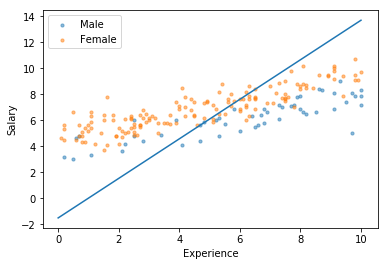

In [26]:
'''추정된 회귀계수가 beta=[B0,B2,B3]이라면, 다음 코드를 통해 시각화가 가능합니다'''

fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male',alpha=0.5)
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female',alpha=0.5)
#plt.scatter(X[:,1], X[:,2],c=T , s=10, alpha=0.8)
x_axis = np.linspace(0, 10,50)
y_axis = -(beta[0] + x_axis*beta[1]) / beta[2]

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.plot(x_axis, y_axis)
plt.legend()
plt.show()

#결과 그래프를 살펴보면 회귀선이 데이터와 유사한 형태로 그려졌지만 적합이 잘 되지 않았음을 알 수 있음




### 직접 구현을 한 rough한 GD이기 때문에 성능이 안좋을 수 있습니다
### 초기값에 매우 민감하며, 기타 하이퍼 파라미터에 따라 성능이 달라집니다